# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [1]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier

In [2]:
review_headers = pd.read_csv("review_rating_headers.txt", sep = ":", header=None)

In [3]:
review_headers

,0,1
0,Attribute 1,Unique user id
1,Attribute 2,Average ratings on churches
2,Attribute 3,Average ratings on resorts
3,Attribute 4,Average ratings on beaches
4,Attribute 5,Average ratings on parks
5,Attribute 6,Average ratings on theatres
6,Attribute 7,Average ratings on museums
7,Attribute 8,Average ratings on malls
8,Attribute 9,Average ratings on zoo
9,Attribute 10,Average ratings on restaurants


**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

In [4]:
def extractWords(sentence):
    lst = re.sub('\W+',' ', sentence).split(" ")
    lst = list(filter(None, lst))
    extractLst = []
    for i, word in enumerate (lst):
        if word == 'on':
            extractLst = lst[(i+1):]
    concatLst = '_'.join(extractLst)
    return concatLst

def extract_all(df,lst):
    for sentence in df.iloc[1:,1]:
        lst.append(extractWords(sentence))
    return lst



first_lst = review_headers.iloc[0,1].split(" ")
first_col = [first_lst[2] + "_" + first_lst[3]]  
col_lst = extract_all(review_headers,first_col)
print (col_lst)

['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']


Question 1: How many headers are there with 2 or more words combined by an underscore?

In [5]:
def combine_num(lst):    
    count = 0
    for x in col_lst:
        if "_" in x:
            count += 1
    return count
print ("There are %d headers with 2 or more words combined by an underscore." % combine_num(col_lst))

There are 11 headers with 2 or more words combined by an underscore.


Question 2: How many underscores are there in all of the headers? 

In [6]:
print ("There are %d underscores." % (len(re.findall('_', str(col_lst)))))

There are 13 underscores.


**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [7]:
review_df = pd.read_csv("review_ratings.csv")
review_df.columns= col_lst+["unamed"]
review_df.set_index('user_id', inplace=True)
review_df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,unamed
user_id,,,,,,,,,,,,,,,,,,,,,
User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,2.11,...,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89,NaN
User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,2.63,...,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35,NaN
User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,1.55,...,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73,NaN
User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,4.94,...,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21,NaN
User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,2.58,...,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09,NaN


Question 3: How many rows are in the ratings dataset?

In [8]:
review_df.shape[0]

4456

**Task:** Import review_ratings_with_headers.csv

In [9]:
review_headers = pd.read_csv("review_ratings_with_headers.csv", index_col = 0)

**Task:** Explore data types in the dataset

In [10]:
review_headers.dtypes

churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 4: What data type is **parks**?

In [11]:
review_headers.parks.dtypes

dtype('float64')

**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

In [12]:
boundary = string.digits + '.'
for i, cha in enumerate (list(review_headers.local_services)):
    if cha.strip(boundary) != '':
        review_headers['local_services'][i]= '0'

/Users/jill/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
review_headers['local_services'] = review_headers['local_services'].astype('float64')
review_headers['local_services'].dtypes

dtype('float64')

Question 5: What was the variable that contained special characters?

local_services

Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

In [14]:
round(review_headers.local_services.mean(),2)

2.55

**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [15]:
review_headers = review_headers.fillna(0)
review_headers.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,...,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,1.452987,2.304504,2.483409,2.790247,2.966690,2.908746,3.378438,2.542897,3.125222,2.832208,...,2.224661,1.189217,0.950121,0.828218,0.966405,0.994675,0.962089,1.734473,1.523761,1.549632
std,0.829420,1.418781,1.246003,1.304826,1.339469,1.288723,1.414961,1.116005,1.357130,1.306910,...,1.727771,1.109464,0.984810,0.963599,1.198750,1.183759,0.919017,1.585888,1.313043,1.165424
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.530000,1.737500,1.780000,1.790000,1.940000,1.620000,1.800000,1.630000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.880000,2.065000,2.450000,2.670000,2.700000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.770000,1.020000,1.070000,1.290000
75%,1.810000,2.670000,2.740000,4.062500,4.330000,3.910000,5.000000,3.192500,5.000000,3.492500,...,4.900000,1.150000,0.910000,0.840000,0.860000,0.860000,1.000000,2.060000,1.540000,1.650000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Question 7: What is the IQR of ratings for **hotels_other_lodgings**?

In [16]:
Q1 = review_headers.hotels_other_lodgings.quantile(0.25)
Q3 = review_headers.hotels_other_lodgings.quantile(0.75)
IQR = round((Q3 - Q1),2)
print (IQR)

1.18


**Task:** Import review_ratings_processed.csv

In [17]:
review_process = pd.read_csv('review_ratings_processed.csv', index_col = 0)
review_process.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
user_id,,,,,,,,,,,,,,,,,,,,,
User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,2.11,...,1.99,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89
User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,2.63,...,5.00,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35
User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,1.55,...,0.78,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73
User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,4.94,...,0.96,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21
User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,2.58,...,1.76,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09


**Task:** Find the variables that are most correlated with each other

In [18]:
correlation = review_process.corr().abs()
correlation.unstack().sort_values(ascending = False).drop_duplicates()

gardens                gardens                  1.000000
theatres               parks                    0.623595
pubs_bars              restaurants              0.564639
zoo                    pubs_bars                0.554738
                       restaurants              0.527385
swimming_pools         gyms                     0.524064
hotels_other_lodgings  juice_bars               0.511304
gardens                churches                 0.486649
theatres               museums                  0.481160
monuments              view_points              0.471765
hotels_other_lodgings  burger_pizza_shops       0.470846
local_services         pubs_bars                0.468026
monuments              gardens                  0.452118
gyms                   bakeries                 0.433683
restaurants            malls                    0.426686
churches               monuments                0.411541
beaches                parks                    0.399979
malls                  zoo     

In [19]:
print ("Most correlated variables are: theatres and parks.")

Most correlated variables are: theatres and parks.


Question 8: Which variables are the the most **positively** correlated?

In [20]:
correlation_noabs = review_process.corr()
correlation_noabs.unstack().sort_values(ascending = False).drop_duplicates()

gardens             gardens                  1.000000
parks               theatres                 0.623595
pubs_bars           restaurants              0.564639
zoo                 pubs_bars                0.554738
restaurants         zoo                      0.527385
gyms                swimming_pools           0.524064
juice_bars          hotels_other_lodgings    0.511304
churches            gardens                  0.486649
museums             theatres                 0.481160
view_points         monuments                0.471765
burger_pizza_shops  hotels_other_lodgings    0.470846
pubs_bars           local_services           0.468026
gardens             monuments                0.452118
gyms                bakeries                 0.433683
restaurants         malls                    0.426686
churches            monuments                0.411541
beaches             parks                    0.399979
malls               zoo                      0.394529
museums             malls   

In [21]:
print ("Most positively correlated variables are: parks and theatres.")

Most positively correlated variables are: parks and theatres.


**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

In [22]:
def creat_bin(df):
    df_bin = df.copy(deep = True)
    df_bin = df.apply(lambda x: pd.cut(x,10), axis = 0)
    col_lst = df.columns.tolist()
    new_col = [x + "_bins" for x in col_lst]
    df_bin.columns = new_col
    return df_bin

# Group each variable into 10 equal-width bins
review_process_bin = creat_bin(review_process)
review_process_bin.head()

,churches_bins,resorts_bins,beaches_bins,parks_bins,theatres_bins,museums_bins,malls_bins,zoo_bins,restaurants_bins,pubs_bars_bins,...,art_galleries_bins,dance_clubs_bins,swimming_pools_bins,gyms_bins,bakeries_bins,beauty_spas_bins,cafes_bins,view_points_bins,monuments_bins,gardens_bins
user_id,,,,,,,,,,,,,,,,,,,,,
User 777,"(1.5, 2.0]","(1.5, 2.0]","(1.5, 2.0]","(4.583, 5.0]","(1.896, 2.284]","(1.888, 2.277]","(1.896, 2.284]","(1.688, 2.102]","(1.672, 2.088]","(2.067, 2.486]",...,"(1.5, 2.0]","(1.5, 2.0]","(1.0, 1.5]","(1.0, 1.5]","(1.0, 1.5]","(1.0, 1.5]","(0.5, 1.0]","(0.5, 1.0]","(1.5, 2.0]","(1.5, 2.0]"
User 5278,"(1.0, 1.5]","(1.5, 2.0]","(1.0, 1.5]","(1.664, 2.081]","(1.508, 1.896]","(1.499, 1.888]","(1.508, 1.896]","(2.516, 2.93]","(2.504, 2.92]","(2.486, 2.905]",...,"(4.5, 5.0]","(4.5, 5.0]","(0.5, 1.0]","(-0.005, 0.5]","(0.5, 1.0]","(0.5, 1.0]","(1.0, 1.5]","(1.5, 2.0]","(1.0, 1.5]","(1.0, 1.5]"
User 2374,"(0.5, 1.0]","(0.5, 1.0]","(2.0, 2.5]","(2.498, 2.915]","(4.612, 5.0]","(4.611, 5.0]","(1.508, 1.896]","(1.274, 1.688]","(1.256, 1.672]","(1.229, 1.648]",...,"(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(1.0, 1.5]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]"
User 943,"(1.0, 1.5]","(4.5, 5.0]","(1.0, 1.5]","(4.583, 5.0]","(4.612, 5.0]","(2.666, 3.055]","(2.284, 2.672]","(1.688, 2.102]","(4.584, 5.0]","(4.581, 5.0]",...,"(0.5, 1.0]","(1.0, 1.5]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(1.0, 1.5]","(4.5, 5.0]","(1.0, 1.5]","(1.0, 1.5]"
User 4082,"(1.0, 1.5]","(1.0, 1.5]","(4.5, 5.0]","(2.915, 3.332]","(4.612, 5.0]","(4.611, 5.0]","(4.612, 5.0]","(1.688, 2.102]","(1.672, 2.088]","(2.486, 2.905]",...,"(1.5, 2.0]","(1.5, 2.0]","(0.5, 1.0]","(-0.005, 0.5]","(-0.005, 0.5]","(-0.005, 0.5]","(-0.005, 0.5]","(1.0, 1.5]","(1.0, 1.5]","(1.0, 1.5]"


In [23]:
# Calculate the mean malls rating for each bin
def concat_df (df1,df2):
    df_final = pd.concat([df1,df2],axis = 1)
    return df_final
review_con = concat_df (review_process,review_process_bin)
bin_col = review_process_bin.columns.tolist()
for col in bin_col:
    print ("\nMean malls rating for %s:\n" % (col))
    print (review_con.groupby(col)['malls'].mean())


Mean malls rating for churches_bins:

churches_bins
(-0.005, 0.5]    2.604023
(0.5, 1.0]       3.962534
(1.0, 1.5]       3.711320
(1.5, 2.0]       3.120599
(2.0, 2.5]       2.464386
(2.5, 3.0]       1.692548
(3.0, 3.5]       3.305000
(3.5, 4.0]       1.976852
(4.0, 4.5]       2.665625
(4.5, 5.0]       3.282667
Name: malls, dtype: float64

Mean malls rating for resorts_bins:

resorts_bins
(-0.005, 0.5]    2.302941
(0.5, 1.0]       4.128690
(1.0, 1.5]       3.744255
(1.5, 2.0]       3.279399
(2.0, 2.5]       3.017113
(2.5, 3.0]       2.369977
(3.0, 3.5]       1.885000
(3.5, 4.0]       2.343361
(4.0, 4.5]       2.241667
(4.5, 5.0]       3.678306
Name: malls, dtype: float64

Mean malls rating for beaches_bins:

beaches_bins
(-0.005, 0.5]    2.250000
(0.5, 1.0]       3.947260
(1.0, 1.5]       3.749938
(1.5, 2.0]       3.527115
(2.0, 2.5]       3.052148
(2.5, 3.0]       3.116474
(3.0, 3.5]       2.774767
(3.5, 4.0]       2.834182
(4.0, 4.5]       2.493929
(4.5, 5.0]       3.436935
Name: mal

Question 9: The chart on quanthub.com shows **mall** rating by which variable?

museums

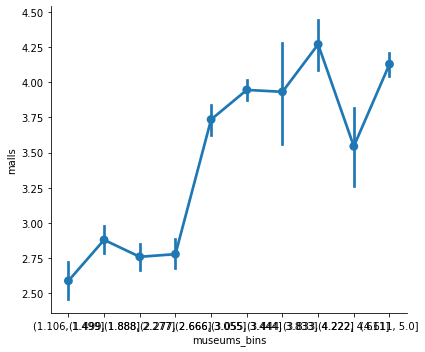

In [24]:
sns.catplot(x="museums_bins", y="malls",aspect =1.2, kind = 'point', data=review_con)

**Task:** Split the dataset into features that include all variables except **juice_bars** and user_id

In [25]:
review_stat = review_process.reset_index(drop=True)
y = review_stat.pop('juice_bars')
X = review_stat

In [26]:
X.head(), y.head(), X.shape, y.shape

(   churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
 0      1.90     1.93     1.95   5.00      2.02     2.00   2.01  2.00   
 1      1.37     1.59     1.42   1.81      1.80     1.79   1.81  2.65   
 2      0.75     0.79     2.03   2.88      5.00     5.00   1.64  1.59   
 3      1.22     5.00     1.28   5.00      5.00     2.83   2.58  1.72   
 4      1.12     1.15     5.00   3.27      5.00     5.00   5.00  1.99   
 
    restaurants  pubs_bars  ...  art_galleries  dance_clubs  swimming_pools  \
 0         2.01       2.11  ...           1.99         1.62            1.41   
 1         2.63       2.63  ...           5.00         5.00            0.52   
 2         1.56       1.55  ...           0.78         0.77            0.78   
 3         5.00       4.94  ...           0.96         1.16            0.58   
 4         1.79       2.58  ...           1.76         1.78            0.51   
 
    gyms  bakeries  beauty_spas  cafes  view_points  monuments  gardens  
 0  1.40  

**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state = 42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3564, 23), (892, 23), (3564,), (892,))

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [29]:
regre = RandomForestRegressor(random_state=42,
                              n_estimators=10)
regre.fit(X_train,y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Question 10: What R-Squared value did the model achieve on the test set?

In [30]:
y_pred = regre.predict(X_test)
round(metrics.r2_score(y_test,y_pred),2)

0.73

**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [31]:
predictions = regre.predict(X)
review_process['predictions'] = predictions

In [32]:
review_process.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,predictions
user_id,,,,,,,,,,,,,,,,,,,,,
User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,2.11,...,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89,1.830
User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,2.63,...,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35,2.933
User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,1.55,...,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73,5.000
User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,4.94,...,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21,0.928
User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,2.58,...,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09,1.721


**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [33]:
review_process ['squared_residual'] = (review_process['predictions']-review_process['juice_bars'])**2

In [34]:
review_process.sort_values(by='squared_residual', ascending=False)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,predictions,squared_residual
user_id,,,,,,,,,,,,,,,,,,,,,
User 3636,2.64,2.63,2.61,2.62,1.80,1.79,1.28,1.28,1.25,1.26,...,0.98,0.97,0.91,0.88,0.87,5.00,4.42,3.67,0.827,17.413929
User 1197,2.02,2.39,2.38,2.40,5.00,3.85,4.21,2.77,2.35,2.78,...,1.04,0.91,0.91,0.92,0.93,0.94,5.00,1.60,0.931,16.556761
User 1516,1.36,1.39,1.41,2.54,3.17,3.18,5.00,5.00,5.00,5.00,...,0.52,0.52,0.53,0.57,0.84,1.47,1.37,1.36,0.935,16.524225
User 5356,2.08,2.28,1.68,1.27,1.24,1.23,1.24,1.41,1.64,1.30,...,2.48,0.93,2.48,5.00,2.50,5.00,2.46,2.45,5.000,15.920100
User 1505,1.39,1.42,1.44,2.54,3.18,3.18,5.00,5.00,5.00,5.00,...,0.53,0.53,0.55,0.57,1.39,1.37,1.36,1.37,1.064,15.492096
User 5097,0.76,1.47,2.75,2.89,5.00,5.00,1.63,1.59,1.57,1.56,...,0.78,0.81,1.14,0.73,0.71,0.70,0.71,0.74,1.246,14.092516
User 2478,0.00,1.41,1.39,1.39,1.42,1.64,2.65,2.64,3.27,3.26,...,1.05,1.05,5.00,0.00,0.00,0.00,0.00,0.51,4.585,13.801225
User 2707,2.08,1.63,1.62,1.50,1.13,1.12,1.13,1.28,1.52,1.54,...,5.00,1.04,2.66,2.59,3.66,5.00,2.31,2.48,4.586,13.220496
User 1198,2.23,2.40,2.40,2.42,5.00,3.81,4.21,2.75,2.35,2.99,...,1.04,1.03,0.91,0.93,0.94,0.96,5.00,1.63,1.377,13.126129


Question 11: What is the value of the **top** loss?

In [35]:
review_sq = review_process.sort_values(by='squared_residual', ascending=False)
print ("Top loss value: %.1f" % (review_sq['squared_residual'][0]))

Top loss value: 17.4


**Task:** Extract the first tree/estimator from the Random Forest Model

In [36]:
first_estimator = regre.estimators_[0]
print (first_estimator)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1608637542, splitter='best')


**Task:** Plot the decision tree with **max depth of 3**

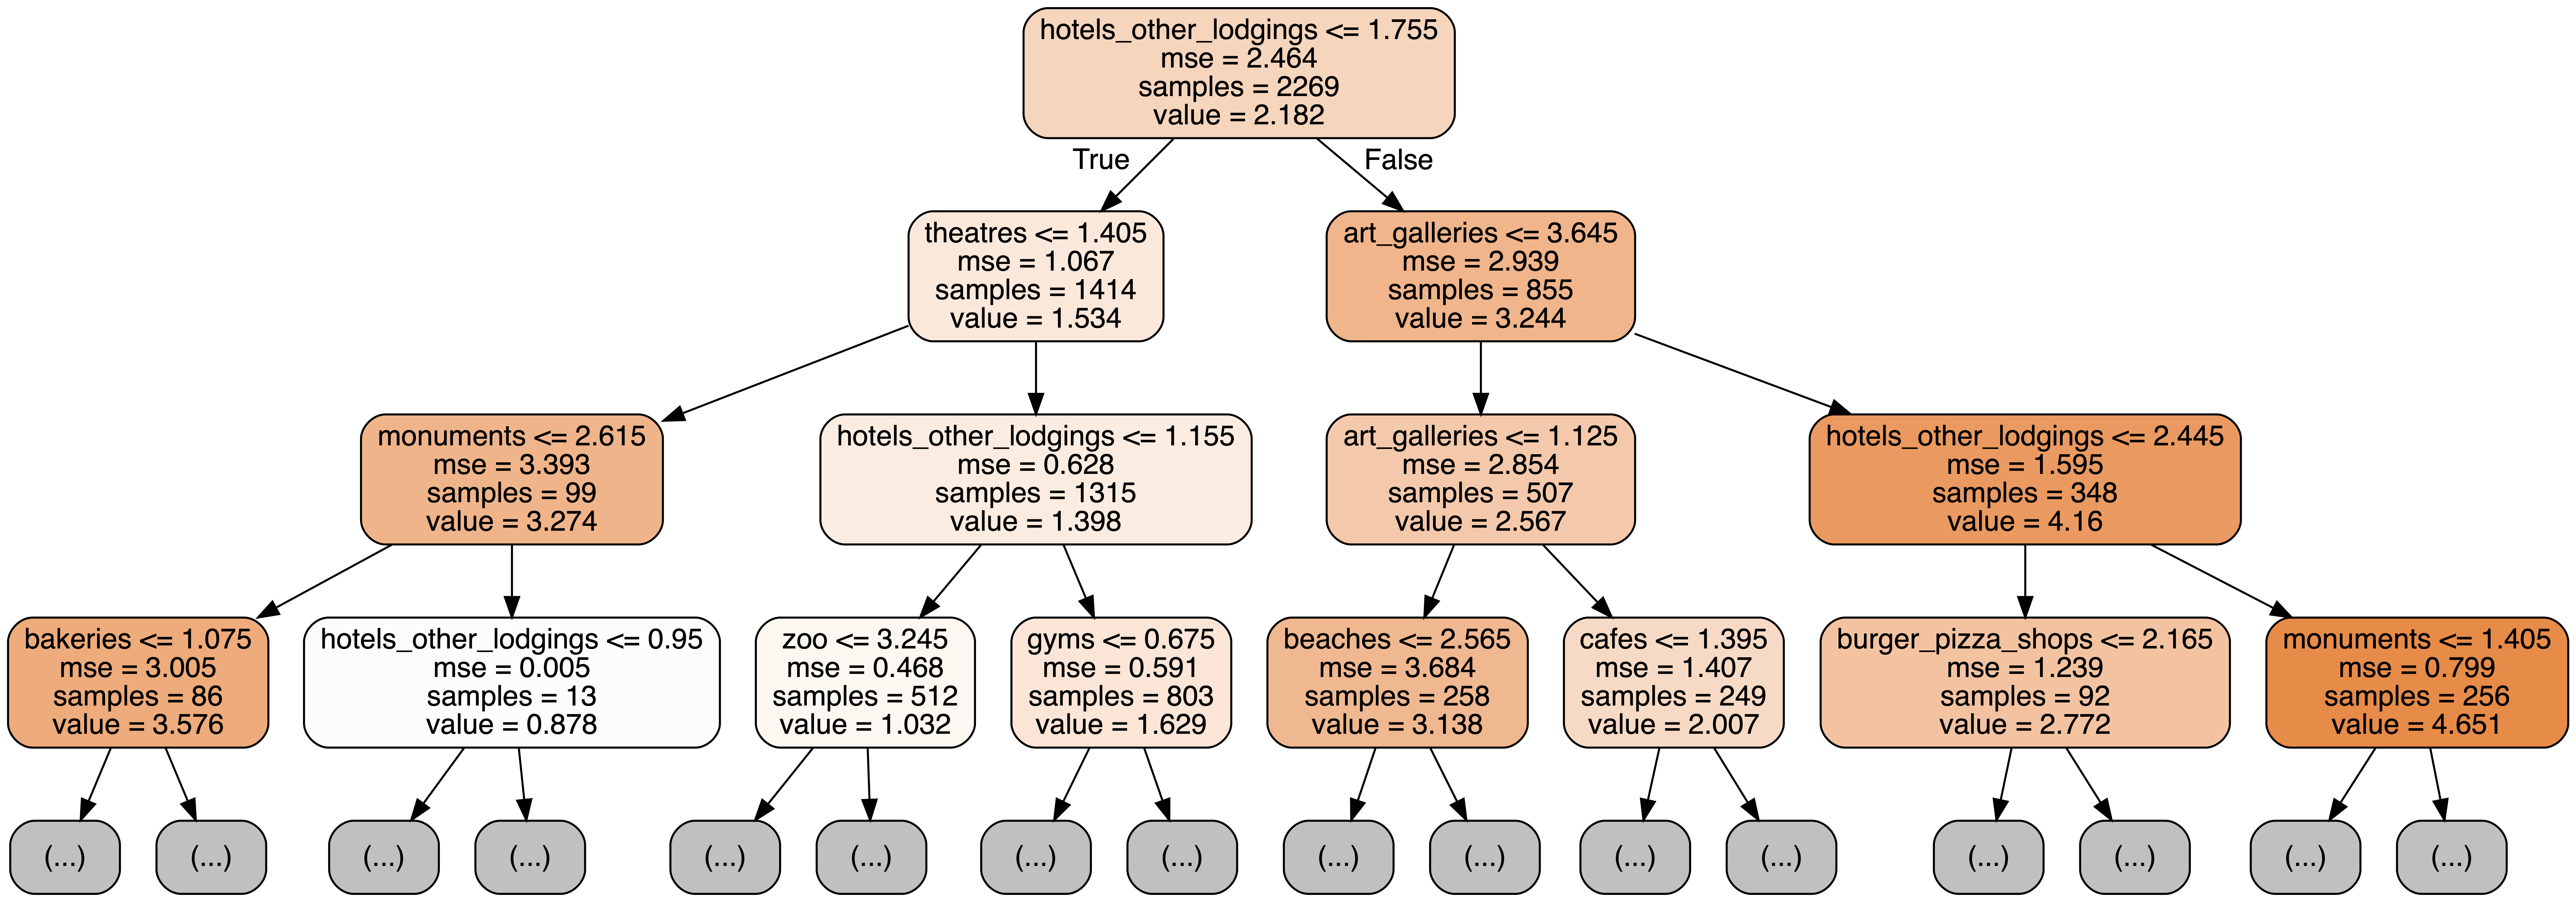

In [37]:
estimator = regre.estimators_[0]
export_graphviz(estimator, out_file='tree.dot', 
                max_depth=3,
                feature_names = X.columns,
                rounded = True, proportion = False, 
                precision = 3, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Question 12: Which variables are included in the **2nd** level split?

In [38]:
print ("theatres", "art_galleries")

theatres art_galleries


**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [39]:
review_process2 = pd.read_csv("review_ratings_processed.csv", index_col = 0)
review_transpose = review_process2.T
review_transpose.index.names = ['location']
review_transpose.columns.names = ['']
review_transpose.fillna(0)

,User 777,User 5278,User 2374,User 943,User 4082,User 574,User 2343,User 1131,User 110,User 4910,...,User 1430,User 280,User 994,User 995,User 1063,User 2739,User 344,User 3066,User 4944,User 4857
location,,,,,,,,,,,,,,,,,,,,,
churches,1.90,1.37,0.75,1.22,1.12,0.90,0.74,0.61,1.25,1.08,...,0.87,2.33,0.54,0.54,1.45,2.58,1.28,2.17,0.92,2.11
resorts,1.93,1.59,0.79,5.00,1.15,0.93,2.53,1.54,1.27,1.31,...,0.89,2.27,0.58,0.58,1.83,2.60,2.42,2.16,5.00,2.63
beaches,1.95,1.42,2.03,1.28,5.00,1.67,2.73,1.55,1.32,2.63,...,2.89,5.00,5.00,5.00,1.83,2.37,2.42,2.17,5.00,2.62
parks,5.00,1.81,2.88,5.00,3.27,2.22,5.00,1.81,1.33,2.63,...,5.00,1.88,1.28,1.28,1.85,1.23,2.63,5.00,4.13,2.64
theatres,2.02,1.80,5.00,5.00,5.00,3.07,5.00,2.02,4.09,2.75,...,5.00,2.32,1.25,1.25,3.18,1.44,2.64,3.07,4.14,3.26
museums,2.00,1.79,5.00,2.83,5.00,5.00,1.67,5.00,4.77,5.00,...,5.00,3.20,4.78,1.27,4.38,1.17,2.22,3.22,2.88,3.24
malls,2.01,1.81,1.64,2.58,5.00,5.00,1.65,3.21,5.00,5.00,...,5.00,4.17,4.78,4.78,4.58,1.16,5.00,3.22,5.00,3.23
zoo,2.00,2.65,1.59,1.72,1.99,4.04,1.63,3.19,2.74,2.15,...,1.45,2.91,4.21,4.16,5.00,1.17,3.84,2.97,2.14,2.80
restaurants,2.01,2.63,1.56,5.00,1.79,5.00,1.63,5.00,2.47,3.12,...,1.44,2.93,5.00,5.00,5.00,1.49,2.83,4.16,2.74,2.78


In [40]:
review_sparse = sparse.csr_matrix(review_transpose.values)
review_sparse

<24x4456 sparse matrix of type '<class 'numpy.float64'>'
	with 102542 stored elements in Compressed Sparse Row format>

**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [41]:
X = review_sparse.toarray()
y = np.array(review_transpose.index.tolist())
print (X,"\n",y)

[[1.9  1.37 0.75 ... 2.17 0.92 2.11]
 [1.93 1.59 0.79 ... 2.16 5.   2.63]
 [1.95 1.42 2.03 ... 2.17 5.   2.62]
 ...
 [0.99 1.51 0.7  ... 3.06 0.87 0.91]
 [1.89 1.36 0.7  ... 1.14 0.88 1.19]
 [1.89 1.35 0.73 ... 1.66 0.9  1.62]] 
 ['churches' 'resorts' 'beaches' 'parks' 'theatres' 'museums' 'malls' 'zoo'
 'restaurants' 'pubs_bars' 'local_services' 'burger_pizza_shops'
 'hotels_other_lodgings' 'juice_bars' 'art_galleries' 'dance_clubs'
 'swimming_pools' 'gyms' 'bakeries' 'beauty_spas' 'cafes' 'view_points'
 'monuments' 'gardens']


In [42]:
neighb = KNeighborsClassifier(6, algorithm='brute', metric = 'cosine')
neighb.fit(X,y)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Question 13: Which categories are included in the top 5 nearest neighbors to **museums**?

In [43]:
print (X[5], y [5])

[2.   1.79 5.   ... 3.22 2.88 3.24] museums


In [44]:
neighbor_elements = neighb.kneighbors(X[5].reshape(1,-1),return_distance=False)
print (y[neighbor_elements])

[['museums' 'theatres' 'malls' 'parks' 'zoo' 'restaurants']]
